In [ ]:
!pip install bertopic datasets hdbscan umap-learn wordcloud

In [ ]:
from datasets import load_dataset

data = load_dataset(
    'jamescalam/reddit-topics',
    split='train',
    revision='c14d532'
)

# Remove short texts:
data = data.filter(lambda x: True if len(x['selftext']) > 30 else 0)

In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(
    n_neighbors=3,
    n_components=3,
    min_dist=0.05
)

hdbscan_model = HDBSCAN(
    min_cluster_size=80,
    min_samples=40,
    prediction_data=True,
    gen_min_span_tree=True
)

***NOTE**: We need to set `prediction_data=True` otherwise we return **AttributeError: No prediction data was generated***

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stopwords = list(stopwords.words('english')) + ['http', 'https', 'amp', 'com']

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Remove stopwords that can pollute topics:
vectorizer_model = CountVectorizer(
    ngram_range=(1, 2),
    stop_words=stopwords
)

model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    # language='multilingual'
    calculate_probabilities=True,
    verbose=True
)

topics, probs = model.fit_transform(data['selftext'])

In [ ]:
for i in range(5):
    print(f"{topics[i]}: {data['title'][i]}")

1: Followup- Here are the results so far from my algo's price calculations on the symbols you gave me:
1: This 2 hr Mohnish Pabrai lecture is better than 90% of my Ivy League Investing Classes
1: Vital Energy $VUX has “more than doubled production” but the market hasn’t noticed this yet – it was not yet in financials. Easy cashflow, more growth potential and a future stock multibagger using Q4 2021 numbers financials and 900 BOE/D production + higher oil prices of $100 WTI today
1: Keep averaging down or wait?
1: The future of credit card companies vs. ApplePay, Cash App, Venmo, etc.


In [ ]:
model.visualize_barchart()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color='white', max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

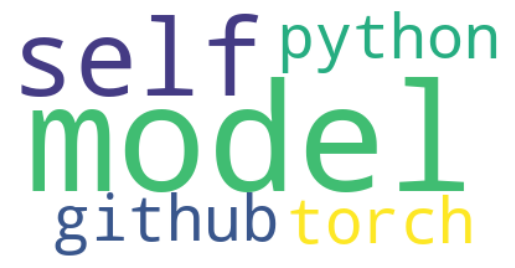

In [ ]:
create_wordcloud(model, topic=0)

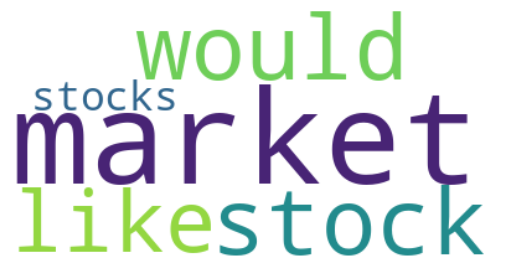

In [ ]:
create_wordcloud(model, topic=1)